In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dont_patronize_me import DontPatronizeMe

In [2]:
# Define the paths
DATA_PATH = "./data/dontpatronizeme_pcl.tsv"
TRAIN_LABELS_PATH = "./data/train_semeval_parids-labels.csv"
DEV_LABELS_PATH = "./data/dev_semeval_parids-labels.csv"
dpm = DontPatronizeMe('./data', 'dontpatronizeme_pcl.tsv')

In [3]:
# Load data
pcl_data = pd.read_csv(DATA_PATH, sep="\t", header=None, skiprows=3)
train_labels = pd.read_csv(TRAIN_LABELS_PATH, sep=",")
dev_labels = pd.read_csv(DEV_LABELS_PATH, sep=",")

In [4]:
# Print Info
print(pcl_data.info())
print(pcl_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10469 non-null  int64 
 1   1       10469 non-null  object
 2   2       10469 non-null  object
 3   3       10469 non-null  object
 4   4       10468 non-null  object
 5   5       10469 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 490.9+ KB
None
   0           1          2   3  \
0  1  @@24942188   hopeless  ph   
1  2  @@21968160    migrant  gh   
2  3  @@16584954  immigrant  ie   
3  4   @@7811231   disabled  nz   
4  5   @@1494111    refugee  ca   

                                                   4  5  
0  We 're living in times of absolute insanity , ...  0  
1  In Libya today , there are countless number of...  0  
2  White House press secretary Sean Spicer said t...  0  
3  Council customers only signs would be displaye...  0  
4  " Just like we received migrants fleeing El

In [7]:
# Get the data form of task 1
dpm.load_task1()
pcl_data = dpm.train_task1_df
pcl_data['text'] = pcl_data['text'].dropna()
print('PCL Data')
print(pcl_data.info())
print(pcl_data.head())

PCL Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10469 entries, 0 to 10468
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   par_id      10469 non-null  object
 1   art_id      10469 non-null  object
 2   keyword     10469 non-null  object
 3   country     10469 non-null  object
 4   text        10469 non-null  object
 5   label       10469 non-null  int64 
 6   orig_label  10469 non-null  object
dtypes: int64(1), object(6)
memory usage: 572.7+ KB
None
  par_id      art_id    keyword country  \
0      1  @@24942188   hopeless      ph   
1      2  @@21968160    migrant      gh   
2      3  @@16584954  immigrant      ie   
3      4   @@7811231   disabled      nz   
4      5   @@1494111    refugee      ca   

                                                text  label orig_label  
0  We 're living in times of absolute insanity , ...      0          0  
1  In Libya today , there are countless number of...      0  

/tmp/ipykernel_4082287/2174132285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues")


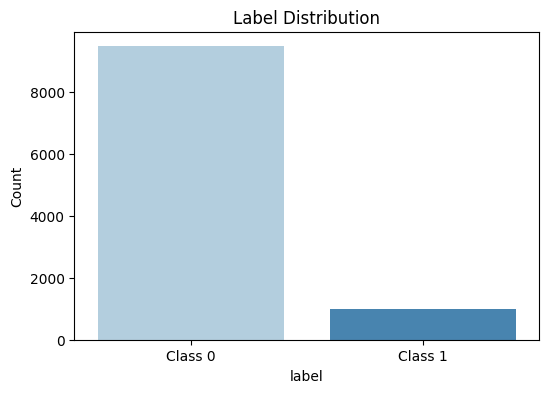

Label Distribution:
label
0    9476
1     993
Name: count, dtype: int64
label
0    90.514853
1     9.485147
Name: proportion, dtype: float64


In [12]:
# 1) Label Distribution
label_counts = pcl_data['label'].value_counts()
label_percent = pcl_data['label'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

print("Label Distribution:")
print(label_counts)
print(label_percent)

/tmp/ipykernel_4082287/4287579554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=keyword_counts.index, x=keyword_counts.values, palette="Oranges")


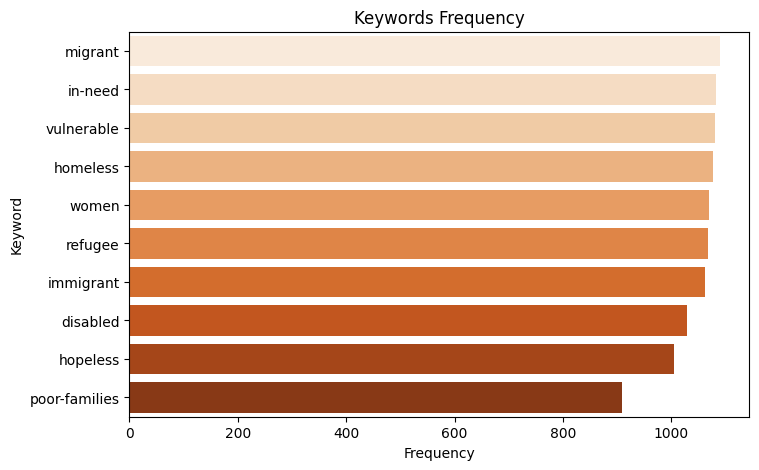

Keywords:
keyword
migrant          1089
in-need          1082
vulnerable       1080
homeless         1077
women            1070
refugee          1068
immigrant        1061
disabled         1028
hopeless         1005
poor-families     909
Name: count, dtype: int64


In [13]:
# 2) Keyword Distribution
keyword_counts = pcl_data['keyword'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(y=keyword_counts.index, x=keyword_counts.values, palette="Oranges")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.title("Keywords Frequency")
plt.show()

print("Keywords:")
print(keyword_counts)

/tmp/ipykernel_4082287/984531251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette="Greens")


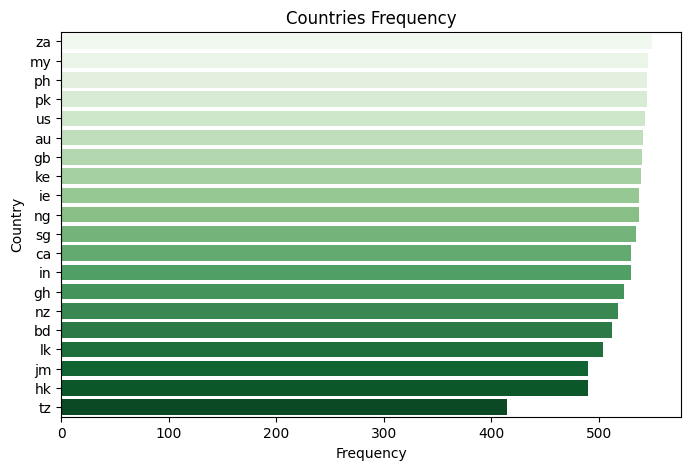

Countries:
country
za    549
my    546
ph    545
pk    545
us    543
au    541
gb    540
ke    539
ie    537
ng    537
sg    535
ca    530
in    530
gh    523
nz    518
bd    512
lk    504
jm    490
hk    490
tz    415
Name: count, dtype: int64


In [14]:
# 3) Country Distribution
country_counts = pcl_data['country'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="Greens")
plt.xlabel("Frequency")
plt.ylabel("Country")
plt.title("Countries Frequency")
plt.show()

print("Countries:")
print(country_counts)

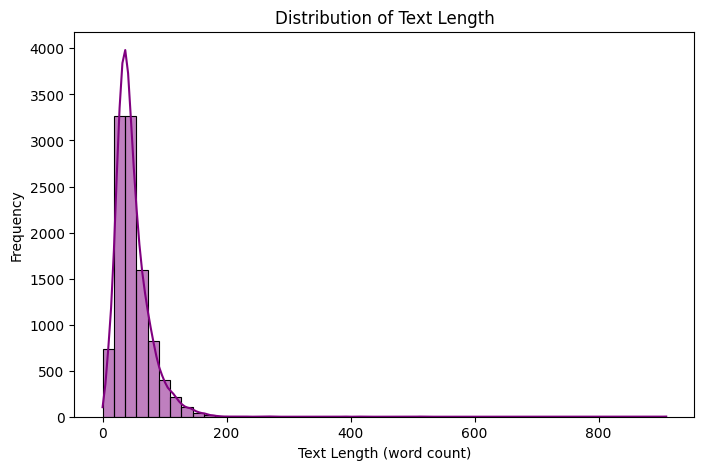

Text Length Statistics:
count    10469.000000
mean        48.422485
std         29.091331
min          0.000000
25%         30.000000
50%         42.000000
75%         60.000000
max        909.000000
Name: text_length, dtype: float64


In [ ]:
# 4) Text Length Distribution
pcl_data['text_length'] = pcl_data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(pcl_data['text_length'], bins=50, kde=True, color="purple")
plt.xlabel("Text Length (word count)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()

print("Text Length Statistics:")
print(pcl_data['text_length'].describe())

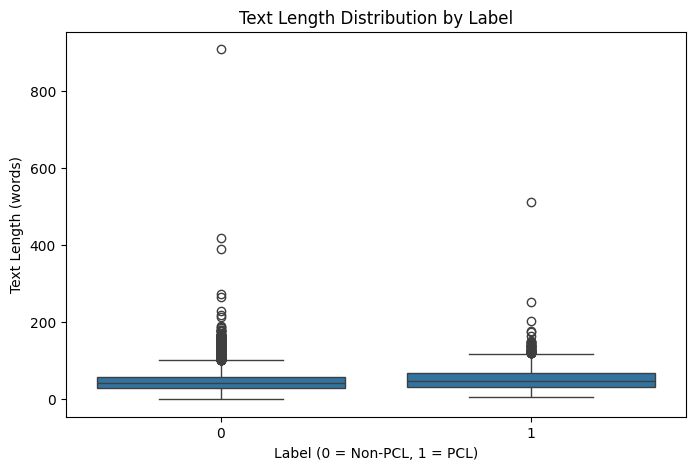

In [17]:
# 5) Text Length vs Label
plt.figure(figsize=(8, 5))
sns.boxplot(x=pcl_data['label'], y=pcl_data['text_length'])
plt.xlabel("Label (0 = Non-PCL, 1 = PCL)")
plt.ylabel("Text Length (words)")
plt.title("Text Length Distribution by Label")
plt.show()

In [18]:
correlation = pcl_data[['label', 'text_length']].corr()
print("Correlation between Text Length and Label:")
print(correlation)

Correlation between Text Length and Label:
                label  text_length
label        1.000000     0.057842
text_length  0.057842     1.000000


/tmp/ipykernel_4082287/844244058.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=keyword_label_counts.index[:20], x=keyword_label_counts["PCL Ratio"][:20], palette="coolwarm")


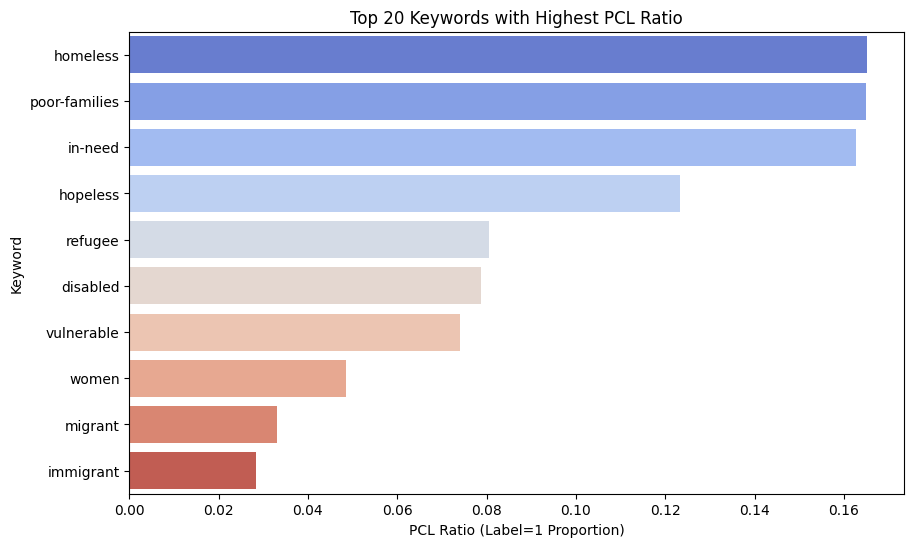

In [20]:
# 6) Keyword vs Label
# Calculate the PCL frequency for each keyword
keyword_label_counts = pcl_data.groupby(["keyword", "label"]).size().unstack(fill_value=0)

# Calculate the PCL ratio
keyword_label_counts["PCL Ratio"] = keyword_label_counts[1] / (keyword_label_counts[0] + keyword_label_counts[1])

# Filter out keywords with less than 10 occurrences
keyword_label_counts = keyword_label_counts[keyword_label_counts.sum(axis=1) > 10]

# Sort by PCL ratio
keyword_label_counts = keyword_label_counts.sort_values("PCL Ratio", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=keyword_label_counts.index[:20], x=keyword_label_counts["PCL Ratio"][:20], palette="coolwarm")
plt.xlabel("PCL Ratio (Label=1 Proportion)")
plt.ylabel("Keyword")
plt.title("Top 20 Keywords with Highest PCL Ratio")
plt.show()

In [21]:
# 1️⃣ Sample examples from both PCL and non-PCL categories
sample_pcl = pcl_data[pcl_data["label"] == 1].sample(5, random_state=42)  # Random 5 PCL samples
sample_non_pcl = pcl_data[pcl_data["label"] == 0].sample(5, random_state=42)  # Random 5 Non-PCL samples

print("📌 **Examples of PCL (Label=1) Texts**")
for index, row in sample_pcl.iterrows():
    print(f"Keyword: {row['keyword']}")
    print(f"Text: {row['text']}\n")

print("📌 **Examples of Non-PCL (Label=0) Texts**")
for index, row in sample_non_pcl.iterrows():
    print(f"Keyword: {row['keyword']}")
    print(f"Text: {row['text']}\n")

# 2️⃣ Identify potentially hard-to-classify samples
# Select keywords that appear frequently in both PCL and non-PCL samples
ambiguous_keywords = pcl_data['keyword'].value_counts().head(10).index.tolist()

# Filter texts with moderate length (neither too short nor too long)
hard_samples = pcl_data[(pcl_data["keyword"].isin(ambiguous_keywords)) & (pcl_data["text"].str.split().str.len().between(10, 30))]

print("📌 **Potentially Hard-to-Classify Examples**")
for index, row in hard_samples.sample(5, random_state=42).iterrows():
    print(f"Keyword: {row['keyword']}")
    print(f"Text: {row['text']}\n")

# 3️⃣ Identify subjective or biased PCL samples
# Focus on PCL texts with emotional or biased keywords
subjective_keywords = ["hopeless", "disabled", "refugee", "migrant"]
subjective_samples = pcl_data[(pcl_data["label"] == 1) & (pcl_data["keyword"].str.contains('|'.join(subjective_keywords), case=False))]

print("📌 **Subjective Examples in PCL (Possible Biased Texts)**")
for index, row in subjective_samples.sample(5, random_state=42).iterrows():
    print(f"Keyword: {row['keyword']}")
    print(f"Text: {row['text']}\n")

📌 **Examples of PCL (Label=1) Texts**
Keyword: women
Text: What I have found , especially with the last woman I dated , is that many women expect everything to be provided ( even when I have suggested some sharing ) for women who believe themselves to be strong and independent individuals . They 'll belt out I Am Woman , while I pick up the tab .

Keyword: in-need
Text: """ Let us make this occasion more meaningful by offering aid to others , especially to those in need . Let us pray for the welfare and safety of our countrymen and for lasting peace in our nation so that we can all work together in harmony towards real change , "" he said ."

Keyword: poor-families
Text: Real poverty of Britain : Shocking images of UK in the Sixties where poor really meant poor <h> THESE hard-hitting photographs offer a glimpse into the harrowing day-to-day for poor families living in Britain during the Sixties .

Keyword: vulnerable
Text: """ A case has been opened and we are also going to have a meet